In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *

2021-11-01 07:48:53.418727: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Series temporales

In [2]:
# Creo conjuntos de entrenamiento, validación y testeo
n_steps = 50
series = generate_time_series(10000, n_steps+1) # [batches, time_steps]
# Las entradas son los primeros 50 puntos, y el target el ultimo que es el que quiero averiguar

X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

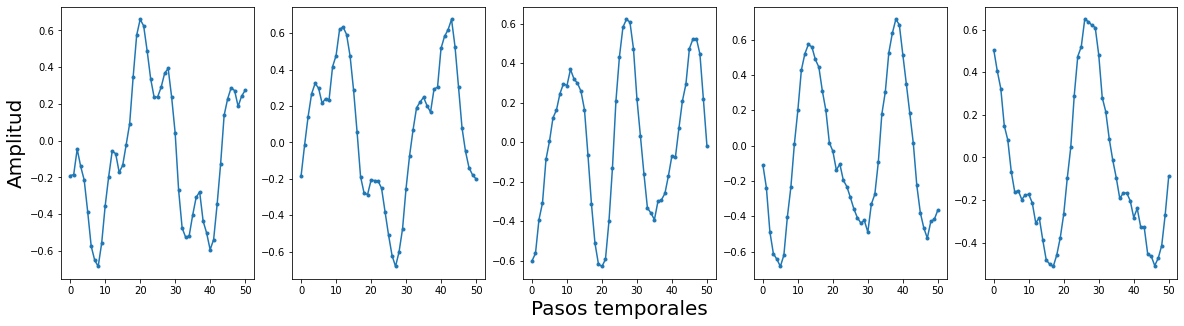

In [3]:
fig, axs = plt.subplots(1,5, figsize=(20,5))
for i in range(5):
    axs[i].plot(series[i,:], '.-')
axs[2].set_xlabel('Pasos temporales', fontsize=20)
axs[0].set_ylabel('Amplitud', fontsize=20)
plt.show()

# Red Neuronal Basica 

In [7]:
fcn_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [n_steps, 1]),
    tf.keras.layers.Dense(1) #Una sola neurona, equivale a una regresion lineal
    ])
fcn_model.compile(optimizer='Adam', loss='mse')
fcn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = fcn_model.fit(x = X_train, y=y_train, validation_data = (X_valid, y_valid), batch_size=32, epochs=20, verbose=1)

Epoch 1/20
219/219 [==============================] - 0s 1ms/step - loss: 0.1023 - val_loss: 0.0466
Epoch 2/20
219/219 [==============================] - 0s 902us/step - loss: 0.0338 - val_loss: 0.0244
Epoch 3/20
219/219 [==============================] - 0s 940us/step - loss: 0.0208 - val_loss: 0.0166
Epoch 4/20
219/219 [==============================] - 0s 925us/step - loss: 0.0154 - val_loss: 0.0131
Epoch 5/20
219/219 [==============================] - 0s 983us/step - loss: 0.0126 - val_loss: 0.0111
Epoch 6/20
219/219 [==============================] - 0s 934us/step - loss: 0.0108 - val_loss: 0.0097
Epoch 7/20
219/219 [==============================] - 0s 926us/step - loss: 0.0094 - val_loss: 0.0085
Epoch 8/20
219/219 [==============================] - 0s 883us/step - loss: 0.0083 - val_loss: 0.0075
Epoch 9/20
219/219 [==============================] - 0s 846us/step - loss: 0.0073 - val_loss: 0.0067
Epoch 10/20
219/219 [==============================] - 0s 884us/step - loss: 0.0066 

In [9]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 219}

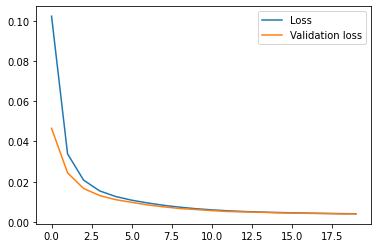

In [10]:
plt.plot(history.epoch, history.history['loss'], label = 'Loss')
plt.plot(history.epoch, history.history['val_loss'], label = 'Validation loss')
plt.legend()

# Red Recurrente Basica

Por defecto, la RNN simple usa una activacion de tangente hiperbolica, puede procesar cualquier largo de secuencia (por eso pongo None en esa dimension) y devuelve solo la ultima salida de la neurona recurrente ( para que devuelva la secuencia tengo que ponerle return_sequences=True)

In [12]:
rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(1, input_shape=[None, 1])
    ])
rnn_model.compile(optimizer='Adam', loss='mse')
rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = rnn_model.fit(x = X_train, y=y_train, validation_data = (X_valid, y_valid), batch_size=32, epochs=20, verbose=1)

Epoch 1/20
219/219 [==============================] - 4s 14ms/step - loss: 0.4466 - val_loss: 0.4359
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.3978 - val_loss: 0.3897
Epoch 3/20
219/219 [==============================] - 3s 14ms/step - loss: 0.3534 - val_loss: 0.3443
Epoch 4/20
219/219 [==============================] - 3s 14ms/step - loss: 0.3105 - val_loss: 0.3006
Epoch 5/20
219/219 [==============================] - 3s 14ms/step - loss: 0.2696 - val_loss: 0.2592
Epoch 6/20
219/219 [==============================] - 3s 13ms/step - loss: 0.2315 - val_loss: 0.2213
Epoch 7/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1970 - val_loss: 0.1881
Epoch 8/20
219/219 [==============================] - 3s 14ms/step - loss: 0.1678 - val_loss: 0.1606
Epoch 9/20
219/219 [==============================] - 3s 13ms/step - loss: 0.1445 - val_loss: 0.1398
Epoch 10/20
219/219 [==============================] - 3s 13ms/step - loss: 0.1262 - val_lo

# Deep RNN

In [14]:
deeprnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.SimpleRNN(1)
    ])
deeprnn_model.compile(optimizer='Adam', loss='mse')
deeprnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 20)          440       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = deeprnn_model.fit(x = X_train, y=y_train, validation_data = (X_valid, y_valid), batch_size=32, epochs=20, verbose=1)

Epoch 1/20
219/219 [==============================] - 12s 52ms/step - loss: 0.0190 - val_loss: 0.0044
Epoch 2/20
219/219 [==============================] - 11s 50ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 3/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 4/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 5/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 6/20
219/219 [==============================] - 12s 57ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/20
219/219 [==============================] - 13s 59ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 8/20
219/219 [==============================] - 13s 59ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 9/20
219/219 [==============================] - 12s 57ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 10/20
219/219 [==============================] - 12s 53ms/step - loss: 0.002

In [123]:

deeprnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
    ])
deeprnn_model.compile(optimizer='Adam', loss='mse')
deeprnn_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_30 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_31 (SimpleRNN)    (None, 20)                820       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = deeprnn_model.fit(x = X_train, y=y_train, validation_data = (X_valid, y_valid), batch_size=32, epochs=20, verbose=1)

Epoch 1/20
219/219 [==============================] - 11s 51ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 2/20
219/219 [==============================] - 11s 50ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 3/20
219/219 [==============================] - 11s 50ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 4/20
219/219 [==============================] - 11s 50ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 5/20
219/219 [==============================] - 11s 50ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 6/20
219/219 [==============================] - 11s 50ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 7/20
219/219 [==============================] - 11s 50ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 8/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 9/20
219/219 [==============================] - 12s 53ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/20
219/219 [==============================] - 11s 52ms/step - loss: 0.002

### Prediciendo mas valores futuros
Usar el modelo que predice de a uno

In [125]:
future = 10
series = generate_time_series(1, n_steps + future) #busco predecir 10 valores 

X_new, Y_new = series[:, :n_steps], series[:, n_steps:] # 50 y 10

X = X_new
for step_ahead in range(future):
    y_pred_one = deeprnn_model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
Y_pred = X[:, n_steps:]

[]

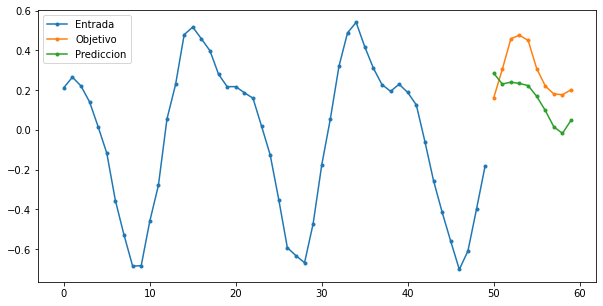

In [126]:
t = np.arange(series.shape[1])
plt.figure(figsize=(10,5))
plt.plot(t[:50],series[0,:][:50], '.-', label = 'Entrada')
plt.plot(t[50:],series[0,:][50:], '.-', label='Objetivo')
plt.plot(t[50:],Y_pred[0,:,0], '.-', label='Prediccion')
plt.legend()
plt.plot()

Armar un modelo que haga predicciones de a 10 (Entreno para que prediga 10 directamente en lugar de 1 solo)

In [127]:
series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

deeprnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(10)
    ])

deeprnn_model.compile(optimizer='Adam', loss='mse')
deeprnn_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_32 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_33 (SimpleRNN)    (None, 20)                820       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [128]:
history = deeprnn_model.fit(x = X_train, y=y_train, validation_data = (X_valid, y_valid), batch_size=32, epochs=20, verbose=1)

Epoch 1/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0532 - val_loss: 0.0303
Epoch 2/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0217 - val_loss: 0.0167
Epoch 3/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0148 - val_loss: 0.0182
Epoch 4/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0126 - val_loss: 0.0119
Epoch 5/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0123 - val_loss: 0.0115
Epoch 6/20
219/219 [==============================] - 6s 30ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 7/20
219/219 [==============================] - 6s 30ms/step - loss: 0.0114 - val_loss: 0.0113
Epoch 8/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0112 - val_loss: 0.0102
Epoch 9/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0106 - val_loss: 0.0119
Epoch 10/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0105 - val_lo

In [131]:
Y_pred.shape

(1, 10)

In [135]:
X_new.shape

(1, 50, 1)

[]

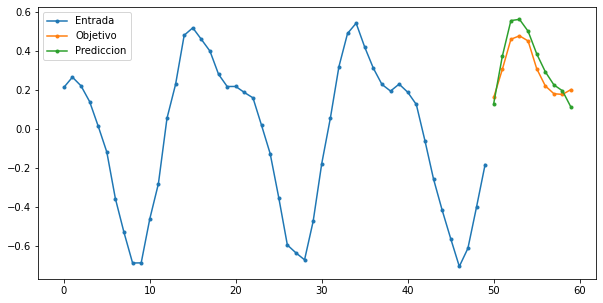

In [138]:
Y_pred = deeprnn_model.predict(X_new)
plt.figure(figsize=(10,5))
plt.plot(t[:50],X_new[0,:,0], '.-', label = 'Entrada')
plt.plot(t[50:],Y_new[0,:,0], '.-', label='Objetivo')
plt.plot(t[50:],Y_pred[0,:], '.-', label='Prediccion')
plt.legend()
plt.plot()

En lugar de entrenar para que a partir de la serie de 50 prediga los proximos 10, puedo entrenarlo para que para cada input prediga los proximos 10. De esta manera, estaria pasando de un sistema de secuencia-a-vector a un sistema de secuencia-a-secuencia.
Para hacer que el sistema sea secuencia-a-secuencia necesito que las entradas y las salidas tengan la misma dimension, y que la salida este corrida un valor hacia el futuro.
Ademas, cada capa de la red tiene que devolver la secuencia entera de las neuronas, y a la salida de cada capa se tiene que aplicar una capa densa con la cantidad de neuronas equivalente a la salida que pretendemos estimar. Esto se logra con la capa timedistributed

In [29]:
series = generate_time_series(100000, n_steps + 10)
X_train = series[:70000, :n_steps]
X_valid = series[70000:90000, :n_steps]
X_test = series[90000:, :n_steps]


Y = np.empty((100000, n_steps, 10)) # Cada target es una secuencia de 10

for step_ahead in range(1, 10 + 1):
    Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:70000]
Y_valid = Y[70000:90000]
Y_test = Y[90000:]

In [18]:
series.shape

(10000, 60, 1)

In [19]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [20]:
sas_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
    ])

Defino una metrica porque me interesa solamente el error presente en el ultimo timestep para la evaluacion. Para el entrenamiento, si me sirve el error en todos los timesteps. 

In [21]:
def last_time_step_mse(Y_true, Y_pred):
    return tf.keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
sas_model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

In [11]:
history = sas_model.fit(x = X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=32, epochs=20, verbose=1)

2021-11-01 07:24:26.308863: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-01 07:24:26.326350: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3199980000 Hz


Epoch 1/20


2021-11-01 07:24:27.037675: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


  7/219 [..............................] - ETA: 5s - loss: 0.2118 - last_time_step_mse: 0.2059

2021-11-01 07:24:27.583011: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


219/219 [==============================] - 8s 30ms/step - loss: 0.0538 - last_time_step_mse: 0.0426 - val_loss: 0.0416 - val_last_time_step_mse: 0.0301
Epoch 2/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0378 - last_time_step_mse: 0.0245 - val_loss: 0.0367 - val_last_time_step_mse: 0.0236
Epoch 3/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0316 - last_time_step_mse: 0.0181 - val_loss: 0.0285 - val_last_time_step_mse: 0.0150
Epoch 4/20
219/219 [==============================] - 7s 30ms/step - loss: 0.0282 - last_time_step_mse: 0.0150 - val_loss: 0.0268 - val_last_time_step_mse: 0.0140
Epoch 5/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0262 - last_time_step_mse: 0.0125 - val_loss: 0.0252 - val_last_time_step_mse: 0.0111
Epoch 6/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0241 - last_time_step_mse: 0.0101 - val_loss: 0.0214 - val_last_time_step_mse: 0.0076
Epoch 7/20
219/219 [=============

In [18]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = sas_model.predict(X_new)[:, -1][..., np.newaxis]

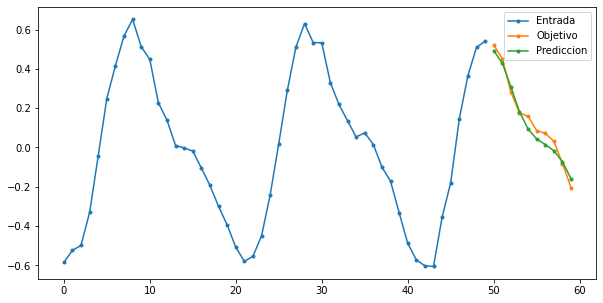

In [19]:
t = np.arange(series.shape[1])
plt.figure(figsize=(10,5))
plt.plot(t[:50],X_new[0,:,0], '.-', label = 'Entrada')
plt.plot(t[50:],Y_new[0,:,0], '.-', label='Objetivo')
plt.plot(t[50:],Y_pred[0,:,0], '.-', label='Prediccion')
plt.legend()


# Normalización de capa

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,input_shape=[None, 1]),
    tf.keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
    ])
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

In [25]:
history = model.fit(x = X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=512, epochs=20, verbose=1)

Epoch 1/20
14/14 [==============================] - 2s 115ms/step - loss: 0.0180 - last_time_step_mse: 0.0060 - val_loss: 0.0181 - val_last_time_step_mse: 0.0059
Epoch 2/20
14/14 [==============================] - 2s 117ms/step - loss: 0.0178 - last_time_step_mse: 0.0058 - val_loss: 0.0181 - val_last_time_step_mse: 0.0060
Epoch 3/20
14/14 [==============================] - 2s 112ms/step - loss: 0.0178 - last_time_step_mse: 0.0057 - val_loss: 0.0180 - val_last_time_step_mse: 0.0058
Epoch 4/20
14/14 [==============================] - 2s 117ms/step - loss: 0.0177 - last_time_step_mse: 0.0057 - val_loss: 0.0179 - val_last_time_step_mse: 0.0058
Epoch 5/20
14/14 [==============================] - 2s 115ms/step - loss: 0.0177 - last_time_step_mse: 0.0057 - val_loss: 0.0180 - val_last_time_step_mse: 0.0059
Epoch 6/20
14/14 [==============================] - 2s 117ms/step - loss: 0.0176 - last_time_step_mse: 0.0056 - val_loss: 0.0181 - val_last_time_step_mse: 0.0059
Epoch 7/20
14/14 [==========

In [26]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
    ])
lstm_model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

In [30]:
history = lstm_model.fit(x = X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=512, epochs=20, verbose=1)

Epoch 1/20
137/137 [==============================] - 1s 10ms/step - loss: 0.0172 - last_time_step_mse: 0.0044 - val_loss: 0.0159 - val_last_time_step_mse: 0.0036
Epoch 2/20
137/137 [==============================] - 1s 10ms/step - loss: 0.0154 - last_time_step_mse: 0.0035 - val_loss: 0.0149 - val_last_time_step_mse: 0.0034
Epoch 3/20
137/137 [==============================] - 2s 11ms/step - loss: 0.0146 - last_time_step_mse: 0.0032 - val_loss: 0.0143 - val_last_time_step_mse: 0.0029
Epoch 4/20
137/137 [==============================] - 1s 10ms/step - loss: 0.0140 - last_time_step_mse: 0.0029 - val_loss: 0.0141 - val_last_time_step_mse: 0.0033
Epoch 5/20
137/137 [==============================] - 1s 10ms/step - loss: 0.0137 - last_time_step_mse: 0.0028 - val_loss: 0.0139 - val_last_time_step_mse: 0.0029
Epoch 6/20
137/137 [==============================] - 1s 10ms/step - loss: 0.0134 - last_time_step_mse: 0.0027 - val_loss: 0.0134 - val_last_time_step_mse: 0.0025
Epoch 7/20
137/137 [==

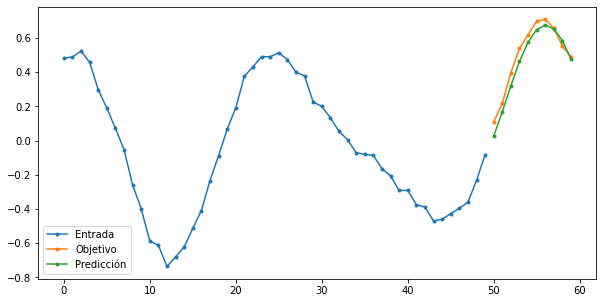

In [35]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = lstm_model.predict(X_new)[:, -1][..., np.newaxis]

t = np.arange(series.shape[1])
plt.figure(figsize=(10,5))
plt.plot(t[:50],X_new[0,:,0], '.-', label = 'Entrada')
plt.plot(t[50:],Y_new[0,:,0], '.-', label='Objetivo')
plt.plot(t[50:],Y_pred[0,:,0], '.-', label='Predicción')
plt.legend()